<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_2_data_generation_and_heatmap_for_analisys_PM_MZM_N_9_Figs_3_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE RESULTS ARE TESTED IN

https://colab.research.google.com/drive/1EU1dDlVmjpHTSvGVl_U3emsOnEeXXvuE#scrollTo=81bFCHH1FM8E

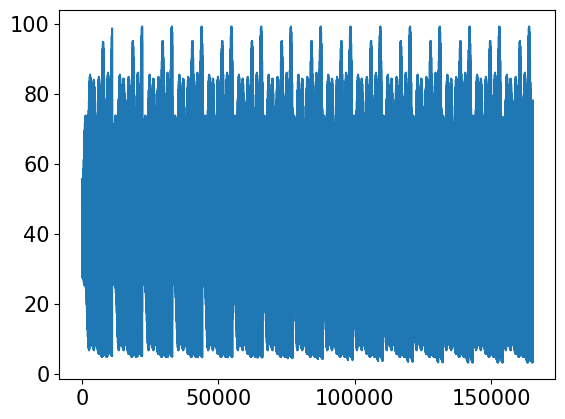

In [ ]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel functio
import matplotlib.pyplot as plt
from google.colab import files
import csv

# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 2.4

ts5 = 2*math.sqrt(5)  # 4.4721
noise = 10**-10; noise_dBm = 10*log10(noise)
# PM fixed parameters values
ang1pm = 0;  Upm1   =  0;        Tpm1  =  (pi*Upm1/Vpi_pm1);
# MZM fixed parameters values
ang1a  = 0;  Umz1a  = Vpi_mz1/2; Th1a  =  (pi*Umz1a/Vpi_mz1);
ang1b  = 0;  Umz1b  =  0;        Th1b  =  (pi*Umz1b/Vpi_mz1);

up_n  =  up_1 = 27
up_m  =  up_2 = 39

up_3 = up_1 + up_2 - 1
up_4 = 9 #9    # new vector reducted for analyze

ia = int((up_3-up_4)/2)   # start reduce vector in range vector
ib = int(ia + up_4)       # end reduce vector in range vector

top_n = int((up_n-1)/2)       # top n(PM) index, positive values
ind_n = range(-top_n,top_n+1) # range index for PM
top_m = int((up_m-1)/2)       # top n(MZ) index, positive values
ind_m = range(-top_m,top_m+1) # range index for MZ

#bot_Apm1 = 3;    top_Apm1  =  4.3;    ax_Apm1 = np.arange(bot_Apm1, top_Apm1, 0.1)    # top value of Apm
bot_Apm1 = 2.1;    top_Apm1  =  3.6;    ax_Apm1 = np.arange(bot_Apm1, top_Apm1, 0.1)    # top value of Apm
bot_Amz1a = 2.1;  top_Amz1a =  12.6;   ax_Amz1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza
bot_Amz1b = 2.1;  top_Amz1b =  12.6;   ax_Amz1b = np.arange(bot_Amz1b, top_Amz1b, 0.1)  # top value of Amzb

#3,5    4,3
#12     14,5
#12     14,5
#temp0 = np.zeros((1,), dtype=complex)
#print(temp1)

#--------------------------end crossprod_efield----------------------------------
def crossprod_efield(up_1, Vector_1, up_2, Vector_2):
 up_vre = up_1 + up_2 - 1    # limite do vetor resultante
 #ax_crossprod_vector = []   # dominio do vetor resultante
 #top_k = int((up_vre-1)/2)
 #ax_crossprod_vector = range(-top_k,top_k+1)
 Matrix_cross_efield = np.zeros((up_1, up_vre), dtype=complex) # Tamanho da matrix
 t = 0
 k = 0
 # -------------------- begin for
 for j in range(up_1):
  temp1 = Vector_1[j]
  for i in range(up_2):
    temp2 = Vector_2[i]
    temp3 = temp1*temp2
    k     = i + t
    Matrix_cross_efield[j][k] = temp3
 #print('\n')
  t = j+1
 # -------------------- end for

 #Vector_EFre  Electric Field Resultant
 v_EFre= np.sum(Matrix_cross_efield, axis=0) #soma das colunas de campos E
 temp2 = [abs(kt) for kt in v_EFre]
 #print(Vector_EFre)
 v_Ire = np.square(temp2)  # Intensity_resultant
 #v_Ire = np.square(abs(Vector_EFre))  # Intensity_resultant # it doesn't work
 return v_EFre, v_Ire
 #return up_vre, Matrix_cross_efield, Vector_EFre, v_Ire

#--------------------------end crossprod_efield----------------------------------

file = open("v_all_values1.csv","a", newline="")
nv = 0
v_std = []
v_all_values_n_9 = []
v_min_std = []

# ------------- MTX 3D STD values --------{ 1/2
len_npm = len(ax_Apm1)
len_mza = len(ax_Amz1a)
len_mzb = len(ax_Amz1b)
m_3d_std = [[[0 for i in range(len_mzb)] for i in range(len_mza)] for i in range(len_npm)]
ipm = 0
ima = 0
imb = 0
#-----------------------------------------}

for iApm in ax_Apm1:
  ima = 0
  for iAa in ax_Amz1a:  #jAa in y axis
    imb = 0
    for iAb in ax_Amz1b:

      v_pm = []
      for n in ind_n:
        J_n_iApm = besselj(n,iApm)
        temp1 = J_n_iApm*exp(j*(n*ang1pm + Tpm1))
        #print(temp1)
        v_pm.append(temp1)


      v_mz = []
      temp2 = np.zeros((1,), dtype=complex)
      for m in ind_m:
        J_m_iA1a = besselj(m,iAa)
        #print(J_m_iA1a)
        J_m_iA1b = besselj(m,iAb)
        #print(J_m_iA1b)
        temp2 = J_m_iA1a*exp(j*(m*ang1a + Th1a)) + J_m_iA1b*exp(j*(m*ang1b + Th1b))
        #print(temp2)
        v_mz.append(temp2)

      #print('MZMZ',v_mz)

      v_1 = v_pm
      v_2 = v_mz
      (v_E,v_I) = crossprod_efield(up_1, v_1, up_2, v_2)

      #print(v_E)
      v_analyze = []     # Analisys range - reducted vector
      #print(" v_analyze ",v_analyze)
      for k in range(ia,ib):
        v_analyze.append(v_I[k]) # take some elements for analyze

      #print(" V analyze ",v_analyze)
      tem_cv = 100*np.std(v_analyze)/np.mean(v_analyze)

      v_std.append(tem_cv)    # vector desv standar,
                               # calculado para cada pente gerado, plotado para
                               # ver o comportamento do std ao variar os As
      a1 = a2 = a3  = 0
      CVmin = 0
      flat  = 0
      #limite de planicidade ---------
      men_dB = 10*log10(min(v_analyze))
      mai_dB = 10*log10(max(v_analyze))
      dif_dB = mai_dB - men_dB
      if dif_dB <= 2:
        flat = 1
        a1 = iApm
        a2 = iAa
        a3 = iAb
      if dif_dB == 2:
        CVmin = tem_cv
      else:
        flat = 0
      #--------------------------------
      #-------------------------------------------------------------------{ 2/2
      m_3d_std[ipm][ima][imb] = tem_cv
      imb = imb + 1
      #-------------------------------------------------------------------}

      nv = nv + 1        # contabiliza a quantidade de comb gerados e analisados
      v_temp = []
      v_temp = [nv, round(iApm,1), round(iAa,1), round(iAb,1), round(tem_cv,8), round(dif_dB, 2), flat, round(CVmin), a1,a2,a3]  # preenche um vetor temporal para junttar id Apm, Aa, Ab, std
      v_all_values_n_9.append(v_temp)                                                 # matriz com os valores anteriores

      writer = csv.writer(file)  # escreve dados
      writer.writerow(v_temp)
    ima = ima + 1
  ipm = ipm + 1


file.close()

plt.plot(v_std)
plt.show()



range values 3d axis matrix ipm = 15 ima = 105 imb = 105


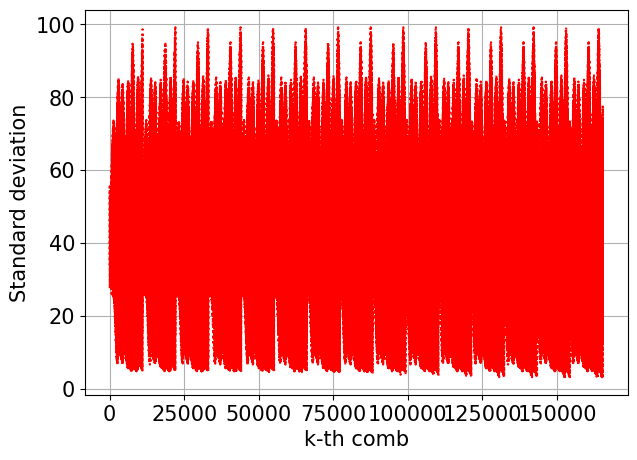

In [ ]:
print('range values 3d axis matrix','ipm =',ipm,'ima =',ima,'imb =',imb)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,5))
plt.plot(v_std, 'r:')
plt.ylabel('Standard deviation')
plt.xlabel('k-th comb')
plt.grid()
plt.show()

15
[2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5]
plot do (1.9, MZa - MZb)


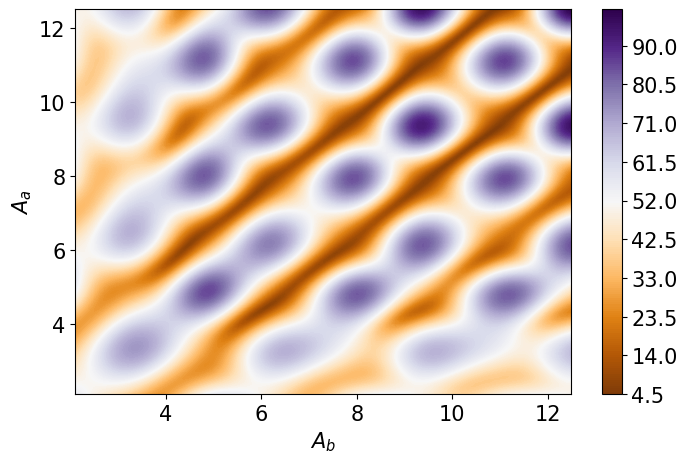

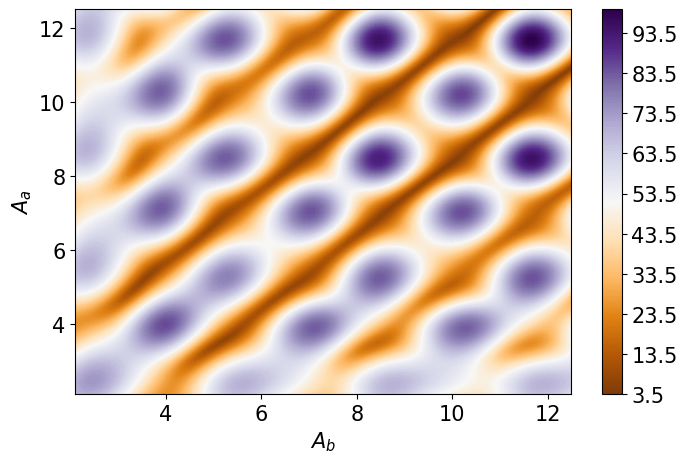

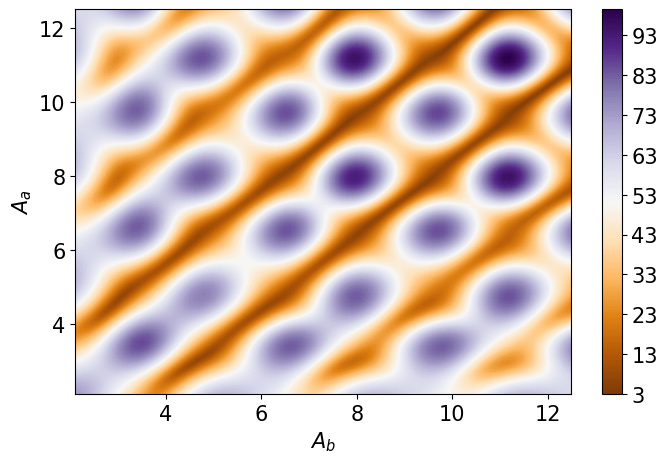

In [ ]:

'''
H0 = m_3d_std[0][:][:]
plt.imshow(H0, interpolation='none')
plt.show()
H1 = m_3d_std[1][:][:]
plt.imshow(H1, interpolation='none')
plt.show()
H2 = m_3d_std[2][:][:]
plt.imshow(H2, interpolation='none')
plt.show()
'''
H0 = m_3d_std[0][:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, H0, 200, cmap='PuOr')
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()

print(len(ax_Apm1))

# 1.5 - 1.6 - 1.7 - 1.8 - 1.9 - 2 - 2.1 - 2.2 - 2.3 - 2.4 - 2.5 - 2.6 - 2.7 - 2.8 - 2.9 - 3
# 0      1     2     3     4    5    6     7    8      9     10    11    12    13    14   15
# COLOR LEVEL COURVES https://matplotlib.org/stable/tutorials/colors/colormaps.html
print(ax_Apm1)

H12 = m_3d_std[9][:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, H12, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()

plt.savefig('grafico__PM_MZM.pdf')


print('plot do (1.9, MZa - MZb)')
H12 = m_3d_std[14][:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, H12, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()



##TESTING CODE